In [1]:
import os
os.chdir('/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/graph_var')

from graph_var.graph_var.utils import read_gfa, group_walks_by_name, _node_recover
from graph_var.graph_var.evaluating_functions import *
import pandas as pd

from collections import defaultdict

In [2]:
version = 'v1'

graph_obj_dir = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Graph_objs_{version}"
raw_vcf_dir = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/VCFs_chr"
graph_vcf_dir = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/VCFs_{version}"

ref_tree_dir = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Data/reference_tree_gfa_{version}"
gfa_dir = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Data/chromosome_gfa_{version}"
snarl_dir = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Data/chr_snarls_{version}"
bubble_summary_dir = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Bubble_summary_{version}"

var_summary_dir = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Stats_chr_{version}"
data_vis_dir = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Data_visualization_{version}"

region_dir = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Region_files"

mode = 'AT'
wavevcf = True

In [3]:
# Chr1
RHD = (25267407, 25362681)
RHD_endpoints = {"3954144", "6251768"}

# Chr6
HLA = (29881897, 29989065)
HLA_endpoints = {"61624562", "61637374"}
C4 = (31984192, 32023863)
C4_endpoints = {"61728291", "61729833"}

# Chr22
CYP2D6 = (42117169, 42136257)
CYP2D6_endpoints = {"44985912", "44987821"}

In [4]:
chr1_gfa_path = f"{gfa_dir}/chr1.gfa"
chr6_gfa_path = f"{gfa_dir}/chr6.gfa"
chr22_gfa_path = f"{gfa_dir}/chr22.gfa"

chr1_superbubble_path = f"{bubble_summary_dir}/superbubble_type_chr1.tsv"
chr6_superbubble_path = f"{bubble_summary_dir}/superbubble_type_chr6.tsv"
chr22_superbubble_path = f"{bubble_summary_dir}/superbubble_type_chr22.tsv"

In [18]:
chr1_gfa = read_gfa(chr1_gfa_path)
chr6_gfa = read_gfa(chr6_gfa_path)
chr22_gfa = read_gfa(chr22_gfa_path)

Analysis: Haplotype frequency in C4 region based on simplified graph

In [5]:
C4_simplified_gfa = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/region_gfa/C4_simplified_gt_100.gfa"

In [6]:
def haplotype_sequence_frequency_in_region(gfa_path, region_simplified_gfa):
    gfa_data = read_gfa(gfa_path)
    walk_sample_dict = group_walks_by_name(gfa_data['walks'], gfa_data['walk_sample_names'])

    region_data = read_gfa(region_simplified_gfa)
    region_node_set = set(region_data['nodes'])

    haplotype_seq_freq = dict()
    for haplotype, walks in tqdm(walk_sample_dict.items()):
        walk_seq_dict = dict()
        for walk in walks:
            region_seq = []
            for node in walk:
                if node[:-2] in region_node_set:
                    region_seq.append(_node_recover(node))
            if len(region_seq) != 0:
                region_path = ''.join(region_seq)
                walk_seq_dict[region_path] = walk_seq_dict.get(region_path, 0) + 1
        haplotype_seq_freq[haplotype] = walk_seq_dict
    return haplotype_seq_freq

def construct_seq_freq(haplotype_seq_freq):
    seq_freq = dict()
    for _, walk_seq_freq in haplotype_seq_freq.items():
        for seq, count in walk_seq_freq.items():
            seq_freq[seq] = seq_freq.get(seq, 0) + count
    return seq_freq

In [7]:
C4_hap_seq = haplotype_sequence_frequency_in_region(chr6_gfa_path, C4_simplified_gfa)

100%|██████████| 90/90 [00:50<00:00,  1.78it/s]


In [9]:
C4_seq = construct_seq_freq(C4_hap_seq)

In [10]:
C4_unique_seq_haplotype_freq = pd.DataFrame({
    "Number of haplotypes": list(C4_seq.values()),
    "Region path": list(C4_seq.keys())
})
C4_unique_seq_haplotype_freq.sort_values(by='Number of haplotypes', inplace=True, ascending=False)

In [11]:
C4_unique_seq_haplotype_freq

,Number of haplotypes,Region path
2,29,<61729826>61729825<61729285<61729279<61729133<...
3,20,>61728291>61728301>61728302>61728308>61728309>...
5,10,<61729833<61729826<61729824<61729823<61729817<...
1,8,<61729833<61729826<61729824<61729823<61729817<...
0,7,>61728291>61728301>61728302>61728308>61728309>...
9,5,>61728291>61728301>61729279>61729285>61729286>...
4,4,<61729826>61729825<61729823<61729817>61729811>...
7,2,<61729826>61729825<61729285<61729279<61729133<...
6,1,>61728291>61728301>61728302>61728308>61728309>...
8,1,<61729833<61729826<61729824<61729823<61729817>...


In [51]:
C4_unique_seq_haplotype_freq.to_csv(f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/haplotype_freq/C4_simplified_gt_100.csv", index=False)

Analysis 1: Superbubble visited by haplotype

In [49]:
def get_superbubble_visit_dict_for_haplotype_in_region(gfa_path, superbubble_path, region_range):
    gfa_data = read_gfa(gfa_path)
    superbubble_df = pd.read_csv(superbubble_path, sep='\t')

    walk_sample_dict = group_walks_by_name(gfa_data['walks'], gfa_data['walk_sample_names'])

    superbubble_in_region_df = superbubble_df[
        superbubble_df['POS'].apply(lambda x: region_range[0] <= int(x) < region_range[1])]

    haplotype_bubble_visit_dict = dict()
    for haplotype, walks in tqdm(walk_sample_dict.items()):
        bubble_walk_dict = defaultdict(list)
        for walk in walks:
            walk_set = {int(node[:-2]) for node in walk}
            for i in range(len(superbubble_in_region_df)):
                bubble_id = eval(superbubble_in_region_df['Bubble'].iloc[i])
                left_end, right_end = bubble_id
                if int(left_end) in walk_set or int(right_end) in walk_set:
                    bubble_walk_dict[bubble_id].append(1)
                else:
                    bubble_walk_dict[bubble_id].append(0)

        haplotype_bubble_visit_dict[haplotype] = bubble_walk_dict
    return haplotype_bubble_visit_dict

def construct_bubble_haplotype_freq(haplotype_bubble_visit_dict):
    bubble_haplotype_freq = dict()
    for _, bubble_visit_dict in haplotype_bubble_visit_dict.items():
        for bubble, visits in bubble_visit_dict.items():
            bubble_haplotype_freq[bubble] = bubble_haplotype_freq.get(bubble, 0) + sum(visits)
    return bubble_haplotype_freq

In [45]:
RHD_superbubble_visit_dict = get_superbubble_visit_dict_for_haplotype_in_region(chr1_gfa_path, 
                                                                                chr1_superbubble_path, 
                                                                                RHD)

HLA_superbubble_visit_dict = get_superbubble_visit_dict_for_haplotype_in_region(chr6_gfa_path, 
                                                                                chr6_superbubble_path, 
                                                                                HLA)

C4_superbubble_visit_dict = get_superbubble_visit_dict_for_haplotype_in_region(chr6_gfa_path, 
                                                                                chr6_superbubble_path, 
                                                                                C4)

CYP2D6_superbubble_visit_dict = get_superbubble_visit_dict_for_haplotype_in_region(chr22_gfa_path, 
                                                                                chr22_superbubble_path, 
                                                                                CYP2D6)

100%|██████████| 90/90 [00:25<00:00,  3.59it/s]


In [50]:
RHD_hap_spb_freq = construct_bubble_haplotype_freq(RHD_superbubble_visit_dict)
HLA_hap_spb_freq = construct_bubble_haplotype_freq(HLA_superbubble_visit_dict)
C4_hap_spb_freq = construct_bubble_haplotype_freq(C4_superbubble_visit_dict)
CYP2D6_hap_spb_freq = construct_bubble_haplotype_freq(CYP2D6_superbubble_visit_dict)

In [52]:
C4_hap_spb_freq

{('61729829', '61729832'): 90,
 ('61729826', '61729829'): 90,
 ('61729285', '61729826'): 90,
 ('61729282', '61729285'): 90,
 ('61729279', '61729282'): 90,
 ('61728301', '61729279'): 90,
 ('61728298', '61728301'): 90,
 ('61728296', '61728298'): 90,
 ('61728293', '61728296'): 90,
 ('61728290', '61728293'): 90}

Bubble number in special regions

In [8]:
example_haplotype = list(RHD_superbubble_visit_dict.keys())[0]

RHD_bubble_count = len(RHD_superbubble_visit_dict[example_haplotype])
HLA_bubble_count = len(HLA_superbubble_visit_dict[example_haplotype])
C4_bubble_count = len(C4_superbubble_visit_dict[example_haplotype])
CYP2D6_bubble_count = len(CYP2D6_superbubble_visit_dict[example_haplotype])

bubble_count_in_region = pd.DataFrame({
    "Region": ["RHD", "HLA", "C4", "CYP2D6"],
    "Number of superbubbles": [RHD_bubble_count, HLA_bubble_count, C4_bubble_count, CYP2D6_bubble_count]
})

In [9]:
bubble_count_in_region

,Region,Number of superbubbles
0,RHD,1
1,HLA,1282
2,C4,10
3,CYP2D6,45


In [10]:
bubble_count_in_region.to_csv(f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/superbubble_count_in_special_regions.csv")

Analysis 2: Variant summary in regions

In [15]:
chr1_graph_vcf_path = f"{graph_vcf_dir}/graph_chr1_no_terminus.vcf"
chr6_graph_vcf_path = f"{graph_vcf_dir}/graph_chr6_no_terminus.vcf"
chr22_graph_vcf_path = f"{graph_vcf_dir}/graph_chr22_no_terminus.vcf"

In [9]:
chr1_raw_vcf_path = f"{raw_vcf_dir}/hprc-v1.1-mc-grch38.raw_chr1.vcf"
chr6_raw_vcf_path = f"{raw_vcf_dir}/hprc-v1.1-mc-grch38.raw_chr6.vcf"
chr22_raw_vcf_path = f"{raw_vcf_dir}/hprc-v1.1-mc-grch38.raw_chr22.vcf"

In [10]:
chr1_vcfwave_path = f"{raw_vcf_dir}/hprc-v1.1-mc-grch38.vcfbub.a100k.wave_chr1.vcf"
chr6_vcfwave_path = f"{raw_vcf_dir}/hprc-v1.1-mc-grch38.vcfbub.a100k.wave_chr6.vcf"
chr22_vcfwave_path = f"{raw_vcf_dir}/hprc-v1.1-mc-grch38.vcfbub.a100k.wave_chr22.vcf"

In [16]:
def filter_vcf_to_region(vcf_path, region_range):
    vcf_df = read_vcf_to_dataframe(vcf_path)
    return vcf_df[vcf_df['POS'].apply(lambda x: int(x) >= region_range[0] 
                                      and int(x) <= region_range[1])]

def variant_type_summary_ourvcf(vcf_df):
    var_dict = {}

    for i in range(len(vcf_df)):
        info_dict = get_info_dict(vcf_df['INFO'].iloc[i])
        TR_MOTIF = 'tandem_repeat' if info_dict['TR_MOTIF'] != '.' else None
        VT = info_dict['VT']
        var_dict[VT] = var_dict.get(VT, 0) + 1
        if TR_MOTIF:
            var_dict[TR_MOTIF] = var_dict.get(TR_MOTIF, 0) + 1
    return var_dict

def alt_allele_num_rawvcf(vcf_df):
    alt_allele_count = 0
    for i in range(len(vcf_df)):
        num = len(vcf_df['ALT'].iloc[i].split(','))
        alt_allele_count += num
    return alt_allele_count

In [17]:
RHD_var_dict = variant_type_summary_ourvcf(filter_vcf_to_region(chr1_graph_vcf_path, RHD))
HLA_var_dict = variant_type_summary_ourvcf(filter_vcf_to_region(chr6_graph_vcf_path, HLA))
C4_var_dict = variant_type_summary_ourvcf(filter_vcf_to_region(chr6_graph_vcf_path, C4))
CYP2D6_var_dict = variant_type_summary_ourvcf(filter_vcf_to_region(chr22_graph_vcf_path, CYP2D6))

In [18]:
ourvcf_total = [sum(RHD_var_dict.values()) - RHD_var_dict.get("tandem_repeat", 0), 
                sum(HLA_var_dict.values()) - HLA_var_dict.get("tandem_repeat", 0), 
                sum(C4_var_dict.values()) - C4_var_dict.get("tandem_repeat", 0), 
                sum(CYP2D6_var_dict.values()) - CYP2D6_var_dict.get("tandem_repeat", 0)]

special_region_variant_summary = pd.DataFrame({
    "Region": ["RHD", "HLA", "C4", "CYP2D6"],
    "SNP": [RHD_var_dict.get("SNP", 0), HLA_var_dict.get("SNP", 0), C4_var_dict.get("SNP", 0), CYP2D6_var_dict.get("SNP", 0)],
    "MNP": [RHD_var_dict.get("MNP", 0), HLA_var_dict.get("MNP", 0), C4_var_dict.get("MNP", 0), CYP2D6_var_dict.get("MNP", 0)],
    "Insertion": [RHD_var_dict.get("INS", 0), HLA_var_dict.get("INS", 0), C4_var_dict.get("INS", 0), CYP2D6_var_dict.get("INS", 0)],
    "Deletion": [RHD_var_dict.get("DEL", 0), HLA_var_dict.get("DEL", 0), C4_var_dict.get("DEL", 0), CYP2D6_var_dict.get("DEL", 0)],
    "Replacement": [RHD_var_dict.get("REP", 0), HLA_var_dict.get("REP", 0), C4_var_dict.get("REP", 0), CYP2D6_var_dict.get("REP", 0)],
    "Duplication": [RHD_var_dict.get("DUP", 0), HLA_var_dict.get("DUP", 0), C4_var_dict.get("DUP", 0), CYP2D6_var_dict.get("DUP", 0)],
    "Tandem repeat": [RHD_var_dict.get("tandem_repeat", 0), HLA_var_dict.get("tandem_repeat", 0), C4_var_dict.get("tandem_repeat", 0), CYP2D6_var_dict.get("tandem_repeat", 0)],
    "Inversion": [RHD_var_dict.get("INV", 0), HLA_var_dict.get("INV", 0), C4_var_dict.get("INV", 0), CYP2D6_var_dict.get("INV", 0)],
    "Our vcf total": ourvcf_total,
    # "Raw vcf total": [RHD_raw_count, HLA_raw_count, C4_raw_count, CYP2D6_raw_count],
    # "Vcfwave total": [RHD_wave_count, HLA_wave_count, C4_wave_count, CYP2D6_wave_count],
})

In [19]:
special_region_variant_summary

,Region,SNP,MNP,Insertion,Deletion,Replacement,Duplication,Tandem repeat,Inversion,Our vcf total
0,RHD,1248,42,153,151,5,0,256,2,1601
1,HLA,3951,161,245,299,48,0,400,0,4704
2,C4,474,12,24,21,5,0,31,0,536
3,CYP2D6,522,52,45,50,6,0,55,0,675


In [16]:
special_region_variant_summary

,Region,SNP,MNP,Insertion,Deletion,Replacement,Duplication,Tandem repeat,Inversion,Our vcf total
0,RHD,1248,42,153,151,5,0,256,2,1601
1,HLA,3951,161,245,299,48,0,400,0,4704
2,C4,474,12,24,21,5,0,31,0,536
3,CYP2D6,522,52,45,50,6,0,55,0,675


In [17]:
special_region_variant_summary.to_csv(f"{data_vis_dir}/special_region_var_summary.csv", index=False)

Analysis 3: Large variants in special regions

In [32]:
def filter_vcf_to_region_and_length(vcf_path, region_range, length_threshold=1000):
    vcf_df = read_vcf_to_dataframe(vcf_path)
    region_filter_bool = vcf_df['POS'].apply(lambda x: int(x) >= region_range[0] 
                                      and int(x) < region_range[1])
    length_filter_bool = vcf_df.apply(lambda x: len(x['REF']) + len(x['ALT']) if x['REF'] != '.' else len(get_info_dict(x['INFO'])['OR']) + len(x['ALT']), 
                                      axis=1) >= length_threshold

    return vcf_df[region_filter_bool & length_filter_bool]

In [34]:
RHD_df = filter_vcf_to_region_and_length(chr1_graph_vcf_path, RHD)
HLA_df = filter_vcf_to_region_and_length(chr6_graph_vcf_path, HLA)
C4_df = filter_vcf_to_region_and_length(chr6_graph_vcf_path, C4)
CYP2D6_df = filter_vcf_to_region_and_length(chr22_graph_vcf_path, CYP2D6)

In [45]:
RHD_df.to_csv(f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/RHD_large_variants.tsv", sep='\t')
HLA_df.to_csv(f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/HLA_large_variants.tsv", sep='\t')
C4_df.to_csv(f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/C4_large_variants.tsv", sep='\t')
CYP2D6_df.to_csv(f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/CYP2D6_large_variants.tsv", sep='\t')


Supplement 1: All variants in special regions

In [ ]:
RHD_df = filter_vcf_to_region(chr1_graph_vcf_path, RHD)
HLA_df = filter_vcf_to_region(chr6_graph_vcf_path, HLA)
C4_df = filter_vcf_to_region(chr6_graph_vcf_path, C4)
CYP2D6_df = filter_vcf_to_region(chr22_graph_vcf_path, CYP2D6)

In [ ]:
RHD_df.to_csv(f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/RHD_variants.tsv", sep='\t')
HLA_df.to_csv(f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/HLA_variants.tsv", sep='\t')
C4_df.to_csv(f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/C4_variants.tsv", sep='\t')
CYP2D6_df.to_csv(f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/CYP2D6_variants.tsv", sep='\t')


Analysis 4: Simplify the subgraph of the specific region

In [4]:
chr1_graph_path = f"{graph_obj_dir}/chr1.pkl.gz"
chr6_graph_path = f"{graph_obj_dir}/chr6.pkl.gz"
chr22_graph_path = f"{graph_obj_dir}/chr22.pkl.gz"

RHD Region

In [5]:
min_al = 1000

In [6]:
G = load_graph_from_pkl(chr1_graph_path, compressed=True)

In [7]:
subgraph = G.simplify_subgraph(RHD, minimum_allele_length=min_al)

In [9]:
write_digraph_to_gfa(subgraph, f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/region_gfa/RHD_simplified_gt_{min_al}_{version}.gfa")

HLA Region

In [10]:
min_al = 1000

In [12]:
G = load_graph_from_pkl(chr6_graph_path, compressed=True)

In [13]:
subgraph = G.simplify_subgraph(HLA, minimum_allele_length=min_al)

In [14]:
write_digraph_to_gfa(subgraph, f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/region_gfa/HLA_simplified_gt_{min_al}_{version}.gfa")

C4 Region

In [97]:
min_al = 100

In [25]:
G = load_graph_from_pkl(chr6_graph_path)

In [98]:
subgraph = G.simplify_subgraph(C4, minimum_allele_length=min_al)

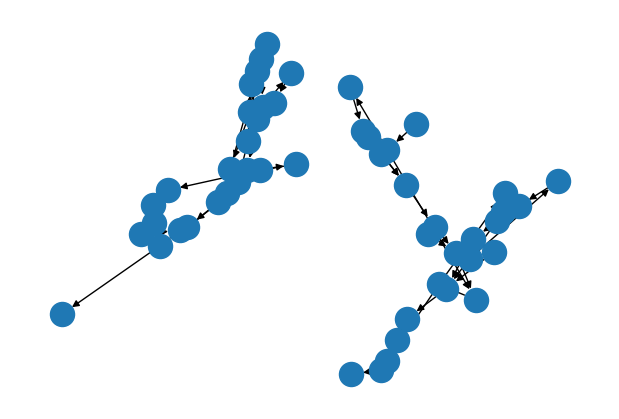

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
nx.draw(subgraph)

plt.savefig("/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/png_file/C4_simplified.png", format="png", dpi=300)
plt.show()

In [99]:
write_digraph_to_gfa(subgraph, f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/region_gfa/C4_simplified_gt_{min_al}.gfa")

CYP2D6 Region

In [104]:
min_al = 100

In [101]:
G = load_graph_from_pkl(chr22_graph_path)

In [105]:
subgraph = G.simplify_subgraph(CYP2D6, minimum_allele_length=min_al)

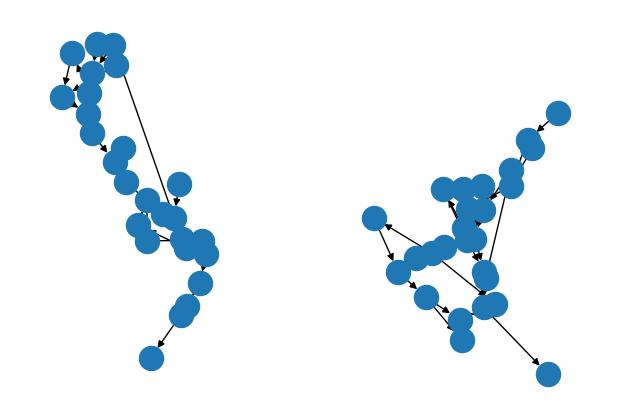

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
nx.draw(subgraph)

plt.savefig("/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/png_file/CYP2D6_simplified.png", format="png", dpi=300)
plt.show()

In [106]:
write_digraph_to_gfa(subgraph, f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Special_region/region_gfa/CYP2D6_simplified_gt_{min_al}.gfa")